# Part I - Prosper Loan Dataset
## by Nurudeen Abdulsalaam

## Table of Contents.
<ul>
    <li><a href = '#intro' >Introduction<a/></li>
    <li><a href = '#pre_wrang' >Preliminary Wrangling<a/></li>
    <li><a href = '#pre_find' >Preliminary Findings<a/></li>
    <li><a href = '#uni_explor' >Univariate Exploration<a/></li>
    <li><a href = '#uni_find' >Univariate Findings<a/></li>
    <li><a href = '#bi_explor' >Bivariate Exploration<a/></li>
    <li><a href = '#bi_find' >Bivariate Findings<a/></li>
    <li><a href = '#multi_explor' >Multivariate Exploration<a/></li>
    <li><a href = '#multi_find' >Multivariate Findings<a/></li>
    <li><a href = '#conclusion' >Conclusion<a/></li>
</ul>




<a id = 'intro'></a>
## Introduction

Prosper Marketplace, Inc. is a San Francisco, California-based company in the peer-to-peer lending industry. Prosper Funding LLC, one of its subsidiaries, operates Prosper.com, a website where individuals can either invest in personal loans or request to borrow money. <a href = 'https://en.wikipedia.org/wiki/Prosper_Marketplace'>Wikipedia</a>

Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between **\$2,000** and **\$40,000.** Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors. Read more at  <a href = 'https://www.prosper.com/about'>prosper.com.</a>

Prosper has a transaction-based business model, in which the company collects revenue by taking a fee on its customers' transactions. Borrowers who receive a loan, pay an origination fee of 1.00% to 5.00%, depending on the borrower's Prosper Rating, and investors pay a 1% annual servicing fee. <a href = 'https://en.wikipedia.org/wiki/Prosper_Marketplace'>Wikipedia</a>

Since its SEC registration in 2009, Prosper has provided a proprietary "Prosper Rating" for prospective borrowers based on the company's estimation of that borrower's "estimated loss rate." According to the company, that figure is "determined by two scores: (1) the credit score, obtained from an official credit reporting agency, and (2) the Prosper Score, figured in-house based on the Prosper population." Prosper Ratings, from lowest-risk to highest-risk, are labeled AA, A, B, C, D, E, and HR ("High Risk"). <a href = 'https://en.wikipedia.org/wiki/Prosper_Marketplace#cite_note-ProsperRatings-11'>Prosper rating</a>


<a id = 'pre_wrang'></a>
## Preliminary Wrangling

This data set includes customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only after they were put in collection. The financial product is a bullet loan that customers should pay off all of their loan debt in just one time by the end of the term, instead of an installment schedule. Of course, they could pay off earlier than their pay schedule. The dataset consists of almost 113937 rows and 81 columns. However,The features of intrest that will be used for this analysis are:<br>
1. **LoanKey:** Unique key for each loan. This is the same key that is used in the API. 

2. **Term:** The length of the loan expressed in months.

3. **LoanStatus:** The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

4. **LoanOriginalAmount:** The origination amount of the loan.

5. **ListingCategory:** The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

6. **ProsperRating (Alpha):** The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

7. **ListingCreationDate:** The date the listing was created.

8. **BorrowerRate:** The Borrower's interest rate for this loan. 

9. **IsBorrowerHomeowner:** A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

10. **Occupation:** The Occupation selected by the Borrower at the time they created the listing.

11. **StatedMonthlyIncome:** The monthly income the borrower stated at the time the listing was created.

12. **EmploymentStatus:** The employment status of the borrower at the time they posted the listing.

13. **DelinquenciesLast7Years:** Number of delinquencies in the past 7 years at the time the credit profile was pulled.

## Check:
<li><a href = 'https://www.prosper.com/Downloads/Services/Documentation/ProsperDataExport_Details.html'>Prosper Data Export Definition - Details<a/> </li>
<li><a href = 'https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub'>Prosper Loan Data - Variable Definitions<a/></li>
<li><a href = 'https://en.wikipedia.org/wiki/Prosper_Marketplace#cite_note-ProsperRatings-11'>Prosper rating<a/></li>
<li><a href = 'https://www.kaggle.com/datasets/zhijinzhai/loandata'>Kaggle/Loan Data<a></li>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Load in your dataset and describe its properties


In [2]:
p_loan = pd.read_csv('prosperLoanData.csv',
                     usecols = ['LoanKey', 'Term', 'LoanStatus', 'LoanOriginalAmount', 'ListingCategory (numeric)',
                                'ProsperRating (Alpha)', 'ListingCreationDate', 'BorrowerRate', 'IsBorrowerHomeowner', 'Occupation',
                                'StatedMonthlyIncome', 'EmploymentStatus', 'DelinquenciesLast7Years'], low_memory = True)

p_loan = p_loan.reindex(columns=['LoanKey', 'Term', 'LoanStatus', 'LoanOriginalAmount', 'ListingCategory (numeric)',
                                 'ProsperRating (Alpha)', 'ListingCreationDate', 'BorrowerRate', 'IsBorrowerHomeowner',
                                 'Occupation', 'StatedMonthlyIncome', 'EmploymentStatus', 'DelinquenciesLast7Years'])
print(p_loan.shape)
p_loan.head()

(113937, 13)


,LoanKey,Term,LoanStatus,LoanOriginalAmount,ListingCategory (numeric),ProsperRating (Alpha),ListingCreationDate,BorrowerRate,IsBorrowerHomeowner,Occupation,StatedMonthlyIncome,EmploymentStatus,DelinquenciesLast7Years
0,E33A3400205839220442E84,36,Completed,9425,0,NaN,2007-08-26 19:09:29.263000000,0.1580,True,Other,3083.333333,Self-employed,4.0
1,9E3B37071505919926B1D82,36,Current,10000,2,A,2014-02-27 08:28:07.900000000,0.0920,False,Professional,6125.000000,Employed,0.0
2,6954337960046817851BCB2,36,Completed,3001,0,NaN,2007-01-05 15:00:47.090000000,0.2750,False,Other,2083.333333,Not available,0.0
3,A0393664465886295619C51,36,Current,10000,16,A,2012-10-22 11:02:35.010000000,0.0974,True,Skilled Labor,2875.000000,Employed,14.0
4,A180369302188889200689E,36,Current,15000,2,D,2013-09-14 18:38:39.097000000,0.2085,True,Executive,9583.333333,Employed,0.0


## Filter out unique values

In [3]:
## Check to be sure that LoanKey has no dulicate value(s)
p_loan.LoanKey.duplicated().sum()

871

In [4]:
## Drop duplicates to get unique LoanKey
p_loan.drop_duplicates(subset = 'LoanKey', inplace = True)
p_loan.LoanKey.duplicated().sum()

0

In [5]:
p_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanKey                    113066 non-null  object 
 1   Term                       113066 non-null  int64  
 2   LoanStatus                 113066 non-null  object 
 3   LoanOriginalAmount         113066 non-null  int64  
 4   ListingCategory (numeric)  113066 non-null  int64  
 5   ProsperRating (Alpha)      83982 non-null   object 
 6   ListingCreationDate        113066 non-null  object 
 7   BorrowerRate               113066 non-null  float64
 8   IsBorrowerHomeowner        113066 non-null  bool   
 9   Occupation                 109537 non-null  object 
 10  StatedMonthlyIncome        113066 non-null  float64
 11  EmploymentStatus           110811 non-null  object 
 12  DelinquenciesLast7Years    112076 non-null  float64
dtypes: bool(1), float64(3), int64

In [6]:
p_loan.isnull().sum()

LoanKey                          0
Term                             0
LoanStatus                       0
LoanOriginalAmount               0
ListingCategory (numeric)        0
ProsperRating (Alpha)        29084
ListingCreationDate              0
BorrowerRate                     0
IsBorrowerHomeowner              0
Occupation                    3529
StatedMonthlyIncome              0
EmploymentStatus              2255
DelinquenciesLast7Years        990
dtype: int64

In [7]:
## Rename LoanOriginalAmount, ListingCategory (numeric), ListingCreationDate, IsBorrowerHomeowner, and StatedMonthlyIncome 
## as LoanAmount, ListingCategory, ListingnDate, Homeowner, and MonthlyIncome respectively

p_loan.rename(columns = {
    'LoanOriginalAmount': 'LoanAmount',
    'ListingCategory (numeric)': 'ListingCategory',
    'ProsperRating (Alpha)': 'ProsperRating',
    'ListingCreationDate': 'ListingDate',
    'IsBorrowerHomeowner': 'Homeowner',
    'StatedMonthlyIncome': 'MonthlyIncome'}, inplace = True)

# conver changes
p_loan.head()

,LoanKey,Term,LoanStatus,LoanAmount,ListingCategory,ProsperRating,ListingDate,BorrowerRate,Homeowner,Occupation,MonthlyIncome,EmploymentStatus,DelinquenciesLast7Years
0,E33A3400205839220442E84,36,Completed,9425,0,NaN,2007-08-26 19:09:29.263000000,0.1580,True,Other,3083.333333,Self-employed,4.0
1,9E3B37071505919926B1D82,36,Current,10000,2,A,2014-02-27 08:28:07.900000000,0.0920,False,Professional,6125.000000,Employed,0.0
2,6954337960046817851BCB2,36,Completed,3001,0,NaN,2007-01-05 15:00:47.090000000,0.2750,False,Other,2083.333333,Not available,0.0
3,A0393664465886295619C51,36,Current,10000,16,A,2012-10-22 11:02:35.010000000,0.0974,True,Skilled Labor,2875.000000,Employed,14.0
4,A180369302188889200689E,36,Current,15000,2,D,2013-09-14 18:38:39.097000000,0.2085,True,Executive,9583.333333,Employed,0.0


## Clean the data

### Make the values of the ListingCategory more readable

In [8]:
# Mapping each number with what it represents
number_label = {0:'Not Availbale', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan',
                5:'Student', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 
                11: 'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases',
                15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}

# Function to apply
def category_label(p_loan):
    if p_loan['ListingCategory'] in number_label.keys():
        label = number_label[p_loan['ListingCategory']]
        return label
    else:
        return p_loan['ListingCategory']

# Apply function
p_loan['ListingCategory'] = p_loan.apply(category_label, axis=1)

# Confirm changes
p_loan.head()

,LoanKey,Term,LoanStatus,LoanAmount,ListingCategory,ProsperRating,ListingDate,BorrowerRate,Homeowner,Occupation,MonthlyIncome,EmploymentStatus,DelinquenciesLast7Years
0,E33A3400205839220442E84,36,Completed,9425,Not Availbale,NaN,2007-08-26 19:09:29.263000000,0.1580,True,Other,3083.333333,Self-employed,4.0
1,9E3B37071505919926B1D82,36,Current,10000,Home Improvement,A,2014-02-27 08:28:07.900000000,0.0920,False,Professional,6125.000000,Employed,0.0
2,6954337960046817851BCB2,36,Completed,3001,Not Availbale,NaN,2007-01-05 15:00:47.090000000,0.2750,False,Other,2083.333333,Not available,0.0
3,A0393664465886295619C51,36,Current,10000,Motorcycle,A,2012-10-22 11:02:35.010000000,0.0974,True,Skilled Labor,2875.000000,Employed,14.0
4,A180369302188889200689E,36,Current,15000,Home Improvement,D,2013-09-14 18:38:39.097000000,0.2085,True,Executive,9583.333333,Employed,0.0


###  convert ProsperRating (Alpha) into ordered categorical types

In [9]:
p2_loan = p_loan.copy()
p2_loan.loc[p2_loan['ProsperRating'].isnull(), 'ProsperRating'] = 'yes'
p3_loan = p2_loan.copy()
p3_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   LoanKey                  113066 non-null  object 
 1   Term                     113066 non-null  int64  
 2   LoanStatus               113066 non-null  object 
 3   LoanAmount               113066 non-null  int64  
 4   ListingCategory          113066 non-null  object 
 5   ProsperRating            113066 non-null  object 
 6   ListingDate              113066 non-null  object 
 7   BorrowerRate             113066 non-null  float64
 8   Homeowner                113066 non-null  bool   
 9   Occupation               109537 non-null  object 
 10  MonthlyIncome            113066 non-null  float64
 11  EmploymentStatus         110811 non-null  object 
 12  DelinquenciesLast7Years  112076 non-null  float64
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 1

In [10]:
ordinal_var = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NILL']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var)
p3_loan['ProsperRating'] = p3_loan['ProsperRating'].astype(ordered_var)

#confirm changes
p3_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   LoanKey                  113066 non-null  object  
 1   Term                     113066 non-null  int64   
 2   LoanStatus               113066 non-null  object  
 3   LoanAmount               113066 non-null  int64   
 4   ListingCategory          113066 non-null  object  
 5   ProsperRating            83982 non-null   category
 6   ListingDate              113066 non-null  object  
 7   BorrowerRate             113066 non-null  float64 
 8   Homeowner                113066 non-null  bool    
 9   Occupation               109537 non-null  object  
 10  MonthlyIncome            113066 non-null  float64 
 11  EmploymentStatus         110811 non-null  object  
 12  DelinquenciesLast7Years  112076 non-null  float64 
dtypes: bool(1), category(1), float64(3), int64(2

In [11]:
p2_loan.ProsperRating.unique()

array(['yes', 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [12]:
ordinal_var = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var)
p_loan['ProsperRating'] = p_loan['ProsperRating'].astype(ordered_var)

#confirm changes
p_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   LoanKey                  113066 non-null  object  
 1   Term                     113066 non-null  int64   
 2   LoanStatus               113066 non-null  object  
 3   LoanAmount               113066 non-null  int64   
 4   ListingCategory          113066 non-null  object  
 5   ProsperRating            83982 non-null   category
 6   ListingDate              113066 non-null  object  
 7   BorrowerRate             113066 non-null  float64 
 8   Homeowner                113066 non-null  bool    
 9   Occupation               109537 non-null  object  
 10  MonthlyIncome            113066 non-null  float64 
 11  EmploymentStatus         110811 non-null  object  
 12  DelinquenciesLast7Years  112076 non-null  float64 
dtypes: bool(1), category(1), float64(3), int64(2

### Drop empty values
- In DelinquenciesLast7Years features since the percentage of the missing values is small
- In ProsperRating being a key feature in this analysis

In [13]:
## Calculate the percentage of missing values in DelinquenciesLast7Years
print(f'{p_loan.DelinquenciesLast7Years.isnull().sum() / len(p_loan.DelinquenciesLast7Years) *100}%')

p_loan.isnull().sum()

0.8755947853466117%


LoanKey                        0
Term                           0
LoanStatus                     0
LoanAmount                     0
ListingCategory                0
ProsperRating              29084
ListingDate                    0
BorrowerRate                   0
Homeowner                      0
Occupation                  3529
MonthlyIncome                  0
EmploymentStatus            2255
DelinquenciesLast7Years      990
dtype: int64

In [14]:
## Extract only the rows with no-missing values in DelinquenciesLast7Years and ProsperRating
p_clean = p_loan[p_loan['DelinquenciesLast7Years'].notnull() & p_loan['ProsperRating'].notnull()]

# Confirm changes
p_clean.isnull().sum()

LoanKey                       0
Term                          0
LoanStatus                    0
LoanAmount                    0
ListingCategory               0
ProsperRating                 0
ListingDate                   0
BorrowerRate                  0
Homeowner                     0
Occupation                 1274
MonthlyIncome                 0
EmploymentStatus              0
DelinquenciesLast7Years       0
dtype: int64

### Replace missing values in *`Occupation`*  with *`Not Available`* to be human readable

In [15]:
p_clean['Occupation'] = p_clean['Occupation'].fillna('Not Available')

# Confirm change
p_clean.isnull().sum()

LoanKey                    0
Term                       0
LoanStatus                 0
LoanAmount                 0
ListingCategory            0
ProsperRating              0
ListingDate                0
BorrowerRate               0
Homeowner                  0
Occupation                 0
MonthlyIncome              0
EmploymentStatus           0
DelinquenciesLast7Years    0
dtype: int64

### Format Datatypes

In [16]:
## Change ListingnDate to datetime
p_clean['ListingDate'] = p_clean['ListingDate'].str.extract('(\d{4}[-]\d{2}[-]\d{2})', expand = True)
p_clean['ListingDate'] = pd.to_datetime(p_clean['ListingDate'])

# Change DelinquenciesLast7Years to integer
p_clean['DelinquenciesLast7Years'] = p_clean['DelinquenciesLast7Years'].astype(int)

## Confirm changes
p_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   LoanKey                  83982 non-null  object        
 1   Term                     83982 non-null  int64         
 2   LoanStatus               83982 non-null  object        
 3   LoanAmount               83982 non-null  int64         
 4   ListingCategory          83982 non-null  object        
 5   ProsperRating            83982 non-null  category      
 6   ListingDate              83982 non-null  datetime64[ns]
 7   BorrowerRate             83982 non-null  float64       
 8   Homeowner                83982 non-null  bool          
 9   Occupation               83982 non-null  object        
 10  MonthlyIncome            83982 non-null  float64       
 11  EmploymentStatus         83982 non-null  object        
 12  DelinquenciesLast7Years  83982 

In [17]:
p_loan.describe()

,Term,LoanAmount,BorrowerRate,MonthlyIncome,DelinquenciesLast7Years
count,113066.000000,113066.000000,113066.000000,1.130660e+05,112076.000000
mean,40.800170,8314.762307,0.192946,5.605120e+03,4.158892
std,10.421518,6237.007841,0.074917,7.495596e+03,10.163465
min,12.000000,1000.000000,0.000000,0.000000e+00,0.000000
25%,36.000000,4000.000000,0.134000,3.199396e+03,0.000000
50%,36.000000,6300.000000,0.184000,4.666667e+03,0.000000
75%,36.000000,12000.000000,0.250600,6.824688e+03,3.000000
max,60.000000,35000.000000,0.497500,1.750003e+06,99.000000


In [18]:
p_clean.head()

,LoanKey,Term,LoanStatus,LoanAmount,ListingCategory,ProsperRating,ListingDate,BorrowerRate,Homeowner,Occupation,MonthlyIncome,EmploymentStatus,DelinquenciesLast7Years
1,9E3B37071505919926B1D82,36,Current,10000,Home Improvement,A,2014-02-27,0.0920,False,Professional,6125.000000,Employed,0
3,A0393664465886295619C51,36,Current,10000,Motorcycle,A,2012-10-22,0.0974,True,Skilled Labor,2875.000000,Employed,14
4,A180369302188889200689E,36,Current,15000,Home Improvement,D,2013-09-14,0.2085,True,Executive,9583.333333,Employed,0
5,C3D63702273952547E79520,60,Current,15000,Debt Consolidation,B,2013-12-14,0.1314,True,Professional,8333.333333,Employed,0
6,CE963680102927767790520,36,Current,3000,Debt Consolidation,E,2013-04-12,0.2712,False,Sales - Retail,2083.333333,Employed,0


<a id = 'pre_find'></a>
# Preliminary Findings

### What is the structure of your dataset?

The original dataset contains 113937 rows and 81 columns out of which 12 features of intrest were selected. After the dataset was loaded, this dataset contains 113937 rows and 12 columns, 113066 rows and 12 columns before and after cleaning respectively.  Most of the variables are either numeric or string in nature, ListingDate is datetime and ProsperScore variable is ordered factor variable with the score ranges from 1-10, with 10 being the best, or lowest risk score.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting if the borrower will be able to pay back the loan in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that ProsperRating will have the strongest effect the probability of paying back: the higher the ProsperRating, the probability that the borrower will be able to pay back. I also think that features Occupation, MonthlyIncome, EmploymentStatus will be usefull in predicting the financial bouyancy of the borrower.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: DelinquenciesLast7Years.

In [19]:
delin_count = p_clean['DelinquenciesLast7Years'].value_counts()
pd.DataFrame(delin_count)

,DelinquenciesLast7Years
0,59358
1,2759
3,2215
2,1978
4,1732
...,...
84,2
98,1
96,1
93,1


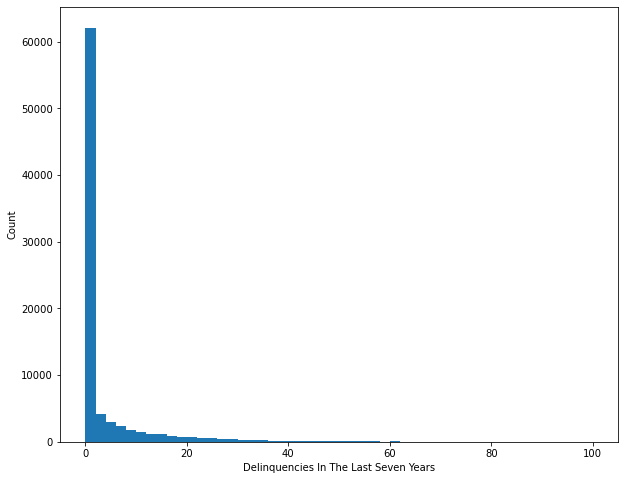

In [20]:
# A histogram plot showing distribution of DelinquenciesLast7Years
bins = np.arange(0, p_clean['DelinquenciesLast7Years'].max()+2, 2)

plt.figure(figsize=[10, 8])
plt.hist(data = p_clean, x = 'DelinquenciesLast7Years', bins = bins)
plt.xlabel('Delinquencies In The Last Seven Years')
plt.ylabel('Count')
plt.show();

Looking at the plot above, it can be seen that the distribution of delinquencies is skewed to the right.This implies that most of the borrower do repay thier loan, some still owning few numbers and little are defaulted of many loans. 

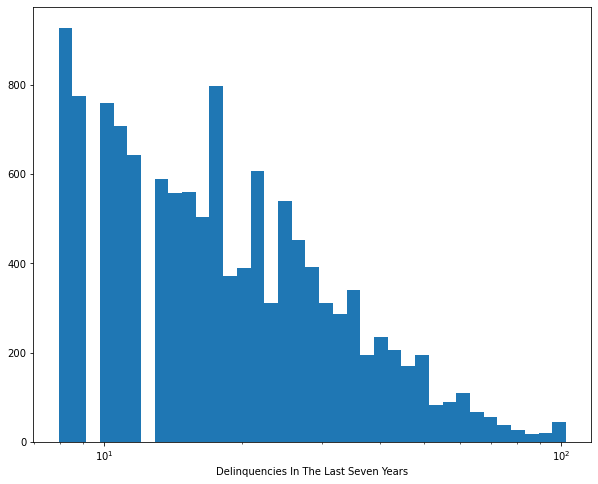

In [21]:
# there's a long tail in the distribution, so I will plot the histogram on a log scale.
log_binsize = 0.03
bins_max = np.log10(p_clean['DelinquenciesLast7Years'].max())
bins = 10 ** np.arange(0.9, bins_max + log_binsize, log_binsize)

plt.figure(figsize = [10, 8])
plt.hist(data = p_clean, x = 'DelinquenciesLast7Years', bins = bins)
plt.xscale('log')
plt.x_ticks = [2, 10, 20, 50, 100]
plt.xlabel('Delinquencies In The Last Seven Years')
#plt.ylabel('Count')
plt.show();

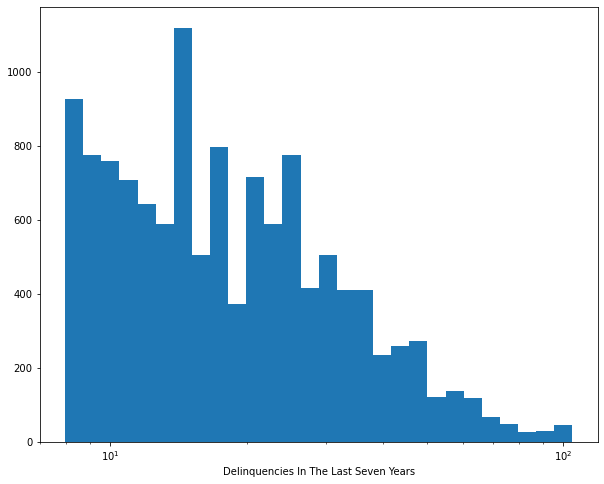

In [22]:
# Ivestigating futher on a bigger binsize
log_binsize = 0.04
bins_max = np.log10(p_clean['DelinquenciesLast7Years'].max())
bins = 10 ** np.arange(0.9, bins_max + log_binsize, log_binsize)

plt.figure(figsize = [10, 8])
plt.hist(data = p_clean, x = 'DelinquenciesLast7Years', bins = bins)
plt.xscale('log')
plt.x_ticks = [2, 10, 20, 50, 100]
plt.xlabel('Delinquencies In The Last Seven Years')
#plt.ylabel('Count')
plt.show();

Delinquencies in the last seven years has a long-tailed distribution, with a lot of borrowers at the low end of delinqueces, and few on the high end. When plotted on a log-scale, the delinquences distribution has roughly one peak around 10 and decreases to the left of the screen

Next up, the first predictor variable of interest: Prosper Rating.

In [23]:
count = p_clean['ProsperRating'].value_counts()
pd.DataFrame(count)

,ProsperRating
C,18096
B,15368
A,14390
D,14170
E,9716
HR,6917
AA,5325


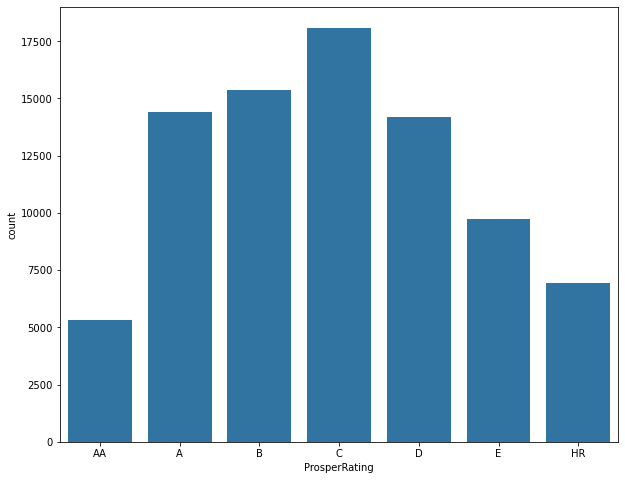

In [24]:
fig = plt.figure(figsize = [10,8])

default_color = sb.color_palette()[0]
sb.countplot(data = p_clean, x = 'ProsperRating', color = default_color)

plt.show()

### Use function to calculate the percentage of each bar

In [25]:
# These are functions defined to plot Bar Graphs of Univariate plots using Seaborn's Countplot function.

def bar_texts(var, x, **kwargs):
    prosper = var.value_counts()
    base_color = sb.color_palette()[0]
    ax = plt.figure(figsize= (10, 8)).subplots()
    sb.countplot(data= p_clean, x= x, y= None, hue= None, color= base_color);
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    locs, labels  = plt.xticks()

    for loc, label in zip(locs, labels):
        count = prosper[label.get_text()]
        percentage = '{:.2f}%'.format((count * 100) / prosper.sum())
        m = plt.text(loc, count, percentage, ha= 'center', va= 'baseline')
    return m

def barh_texts(var, y, **kwargs):
    prosper = var.value_counts()
    base_color = sb.color_palette()[0]
    ax = plt.figure(figsize= (10, 8)).subplots()
    sb.countplot(data= p_clean, y= y, color= base_color);
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    locs, labels = plt.yticks()
    
    for loc, label in zip(locs, labels):
        count = prosper[label.get_text()]
        percentage = '{:.2f}%'.format((count * 100) / prosper.sum())
        m = plt.text(count, loc, percentage, va= 'center', ha= 'left')

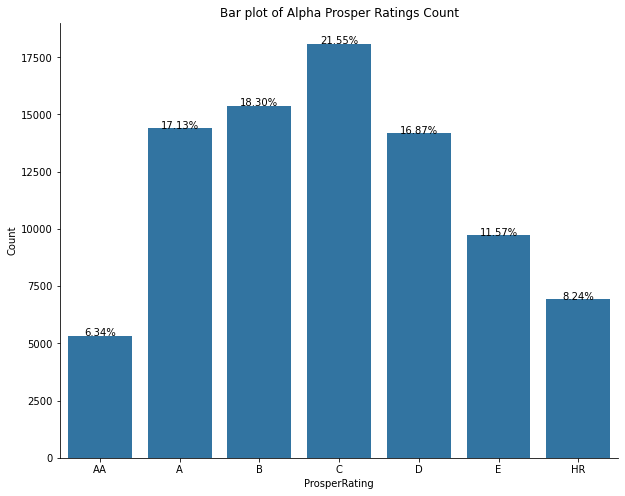

In [26]:
# A bar plot showing borrowers prosper ratings.
bar_texts(p_clean['ProsperRating'], 'ProsperRating')
plt.title('Bar plot of Alpha Prosper Ratings Count')
plt.ylabel('Count');

Looking at the plot above, we can see that a larger number of Borrowers has an Alpha Prosper Rating of `A, B, C and D` (17.13%, 18.30%, 21.55%, 16.87%) these translate to 2.00–3.99%, 4.00–5.99%, 6.00–8.99%, 9.00–11.99% Estimated Average
Annual Loss Rat respectively. The largest value, 21.55%, is observed at `C` Rating. This implies that investor, on average stands a risk of not bein paid back by 4% - 8% which a good risk to take. 

I will check this by plotting bar plot count of LoanStatus

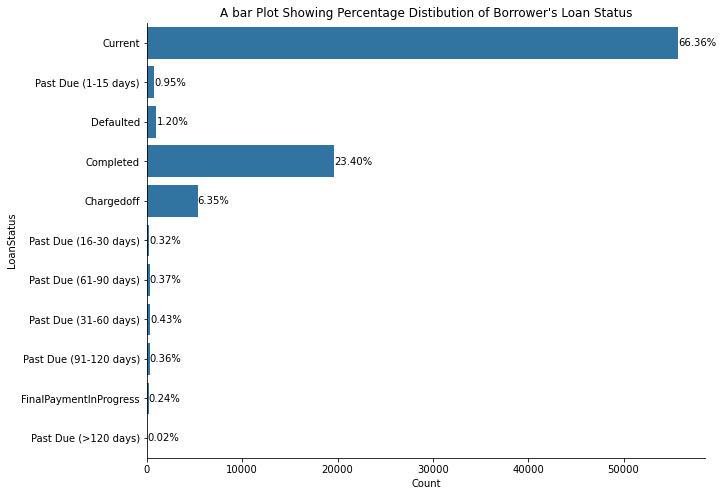

In [27]:
# A horizontal bar plot showing borrowers loan status.
barh_texts(p_clean.LoanStatus, 'LoanStatus')
plt.title('A bar Plot Showing Percentage Distibution of Borrower\'s Loan Status')
plt.xlabel('Count');

## Calculating the percentage of defaulted and completed loans

In [28]:
print(f'''Percentage completed = {round(23.4/(23.4+1.2) * 100, 2)}%
Percentage defaulted = {round(1.2/(23.4+1.2) * 100, 2)}%''')

Percentage completed = 95.12%
Percentage defaulted = 4.88%


> With this, I can that the probability of the borrower paying back the loan is higher
> I'll now move on to the other important variables in the dataset: Occupation, MonthlyIncome, EmploymentStatus.

In [29]:
## barplot of occupation
def count_bar(column, title, width, height):
    column_counts = p_clean[column].value_counts()
    column_order = column_counts.index
    base_color = sb.color_palette()[0]

    plt.figure(figsize=  (width, height))
    sb.countplot(data = p_clean, y = column, color = base_color, order =column_order)
    plt.xlabel('Count', fontsize = 18)
    plt.title(title, fontsize = 18)
    plt.show();

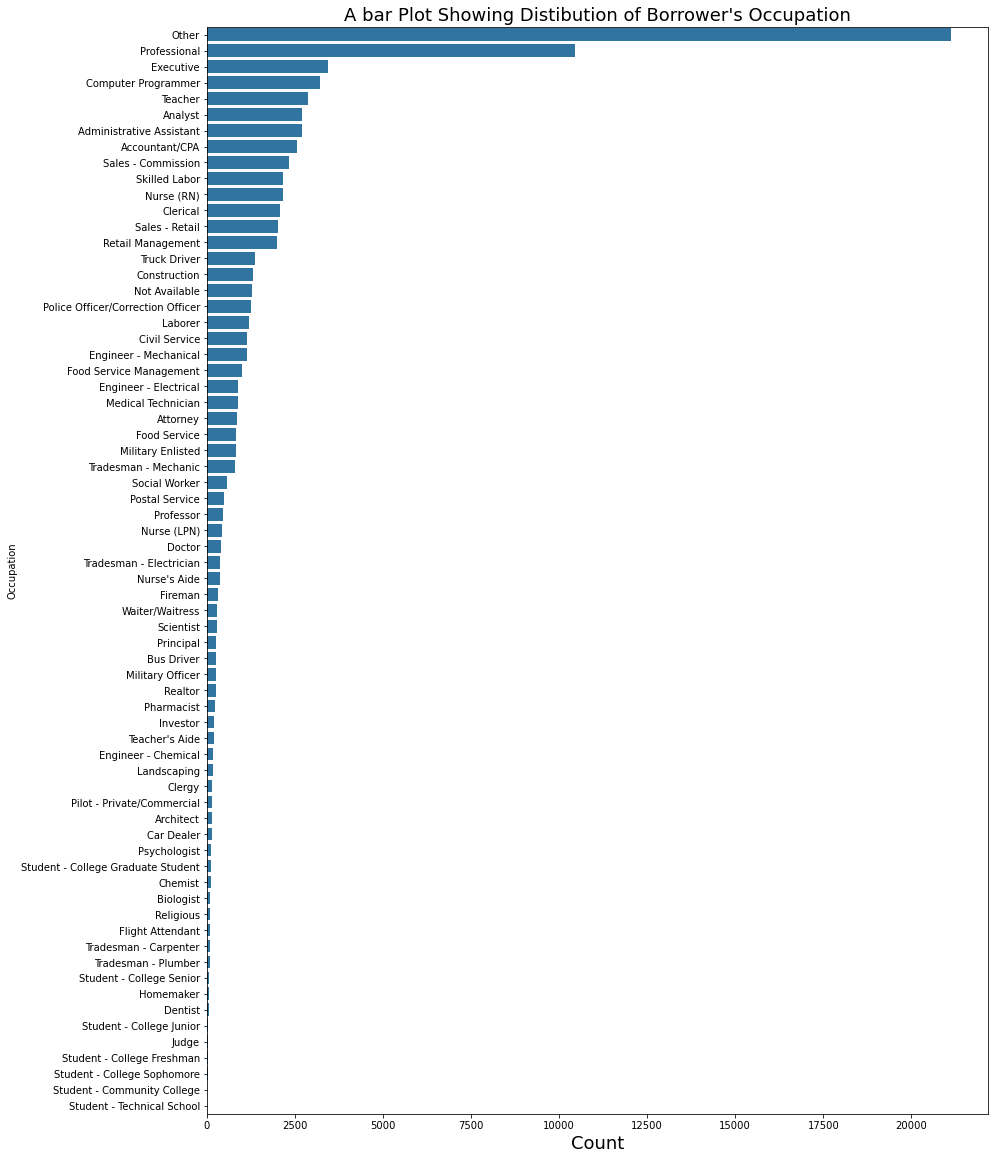

In [30]:
count_bar('Occupation', 'A bar Plot Showing Distibution of Borrower\'s Occupation', 14, 20)

## Below are the top 20 occupations

In [31]:
occup_count = pd.DataFrame(p_clean['Occupation'].value_counts())
occup_count[:20]

,Occupation
Other,21122
Professional,10445
Executive,3437
Computer Programmer,3200
Teacher,2858
Analyst,2711
Administrative Assistant,2697
Accountant/CPA,2550
Sales - Commission,2318
Skilled Labor,2157


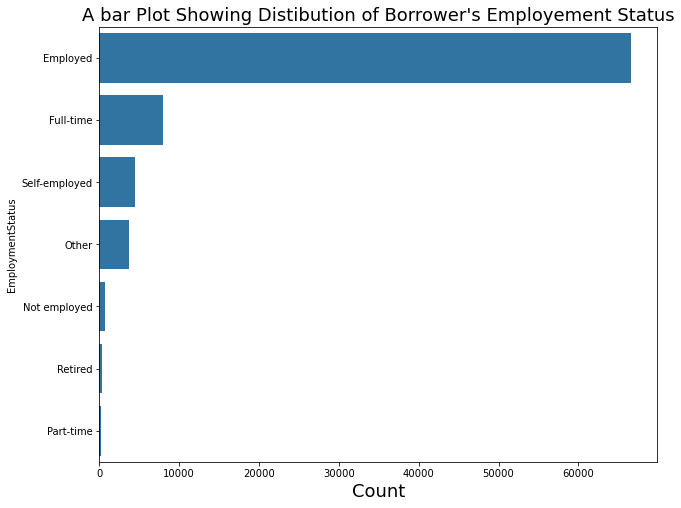

In [32]:
count_bar('EmploymentStatus', 'A bar Plot Showing Distibution of Borrower\'s Employement Status', 10, 8)

The borrowers are generally working class people

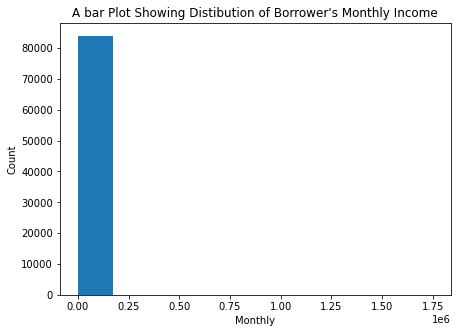

In [33]:
# A histogram plot showing distribution of  monthly income
plt.figure(figsize=[7, 5])
plt.hist(data = p_clean, x = 'MonthlyIncome')
plt.xlabel('Monthly')
plt.ylabel('Count')
plt.title('A bar Plot Showing Distibution of Borrower\'s Monthly Income')
plt.show();

> This shows that there are outliers in the dataset, I will remove the outlier

In [34]:
# select low outliers, using criteria eyeballed from the plots
low_outliers = p_clean['MonthlyIncome'] < 0
high_outliers = p_clean['MonthlyIncome'] > 1 *1e5
print(f'low_outliers: {low_outliers.sum()}\nhigh_outliers: {high_outliers.sum()}')

p_clean.loc[high_outliers,:]

low_outliers: 0
high_outliers: 12


,LoanKey,Term,LoanStatus,LoanAmount,ListingCategory,ProsperRating,ListingDate,BorrowerRate,Homeowner,Occupation,MonthlyIncome,EmploymentStatus,DelinquenciesLast7Years
8066,B7F13618099831699F10189,36,Completed,2000,Debt Consolidation,HR,2011-04-02,0.3199,True,Police Officer/Correction Officer,4.166667e+05,Employed,2
17411,77AC3617940949299F18FAF,36,Completed,7500,Debt Consolidation,E,2011-04-08,0.3199,True,Professional,4.833333e+05,Employed,5
35218,FA693589052604355F304C5,36,Completed,1000,Business,AA,2010-06-01,0.0705,True,Attorney,1.083333e+05,Full-time,0
45028,1A1D36510330659506EDEE0,36,Current,4000,Debt Consolidation,E,2012-05-15,0.2999,False,Nurse (RN),1.500000e+05,Self-employed,0
53014,04DF3672370940669E7B16B,12,Completed,4000,Business,D,2013-01-04,0.1795,True,Other,6.185478e+05,Self-employed,3
53167,3D5836438779123523A2DA1,36,Current,4000,Business,HR,2012-02-20,0.3177,True,Professional,1.750003e+06,Self-employed,0
57133,5D0136156133365609F840F,36,Current,4000,Home Improvement,E,2011-03-24,0.3199,True,Other,4.666667e+05,Employed,0
59298,E0F83644878411746562A6B,36,Current,15000,Wedding Loans,C,2012-02-13,0.2049,False,Other,1.208333e+05,Self-employed,0
80075,1B313703263370099FC7B30,36,Current,25000,Debt Consolidation,C,2014-01-14,0.1655,True,Attorney,1.583333e+05,Employed,0
82831,A27A3661375597374F51686,36,Current,4000,Debt Consolidation,E,2012-09-11,0.2710,True,Other,2.500000e+05,Self-employed,0


In [35]:
# Remove the outlier from the dataset
p_clean = p_clean.loc[-high_outliers]
p_clean

,LoanKey,Term,LoanStatus,LoanAmount,ListingCategory,ProsperRating,ListingDate,BorrowerRate,Homeowner,Occupation,MonthlyIncome,EmploymentStatus,DelinquenciesLast7Years
1,9E3B37071505919926B1D82,36,Current,10000,Home Improvement,A,2014-02-27,0.0920,False,Professional,6125.000000,Employed,0
3,A0393664465886295619C51,36,Current,10000,Motorcycle,A,2012-10-22,0.0974,True,Skilled Labor,2875.000000,Employed,14
4,A180369302188889200689E,36,Current,15000,Home Improvement,D,2013-09-14,0.2085,True,Executive,9583.333333,Employed,0
5,C3D63702273952547E79520,60,Current,15000,Debt Consolidation,B,2013-12-14,0.1314,True,Professional,8333.333333,Employed,0
6,CE963680102927767790520,36,Current,3000,Debt Consolidation,E,2013-04-12,0.2712,False,Sales - Retail,2083.333333,Employed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,9BD7367919051593140DB62,36,Current,10000,Debt Consolidation,C,2013-04-14,0.1864,True,Food Service Management,4333.333333,Employed,7
113933,62D93634569816897D5A276,36,FinalPaymentInProgress,2000,Other,A,2011-11-03,0.1110,True,Professional,8041.666667,Employed,4
113934,DD1A370200396006300ACA0,60,Current,10000,Debt Consolidation,D,2013-12-13,0.2150,True,Other,2875.000000,Employed,0
113935,589536350469116027ED11B,60,Completed,15000,Home Improvement,C,2011-11-14,0.2605,True,Food Service,3875.000000,Full-time,0


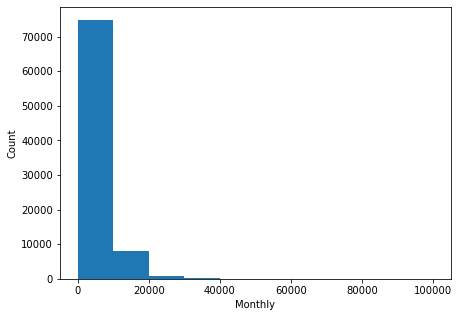

In [36]:
# A histogram plot showing distribution of  monthly income
plt.figure(figsize=[7, 5])
plt.hist(data = p_clean, x = 'MonthlyIncome')
plt.xlabel('Monthly')
plt.ylabel('Count')
plt.show();

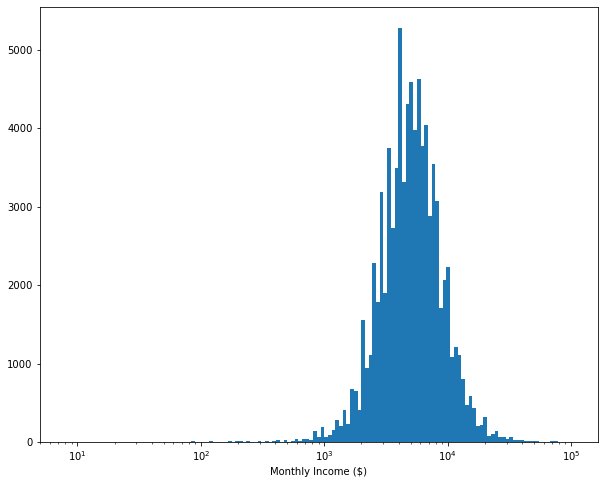

In [37]:
# there's a long tail in the distribution, so I will plot the histogram on a log scale.
log_binsize = 0.03
bins_max = np.log10(p_clean['MonthlyIncome'].max())
bins = 10 ** np.arange(0.9, bins_max + log_binsize, log_binsize)
plt.figure(figsize = [10, 8])
plt.hist(data = p_clean, x = 'MonthlyIncome', bins = bins)
plt.xscale('log')
plt.xlabel('Monthly Income ($)')
#plt.ylabel('Count')
plt.show();

As oppossed to the grah of delinquencies in the last seven years which is skewed left, this graph is skewed right. It's possible that monthly income is negatively correlated with delinquencies 

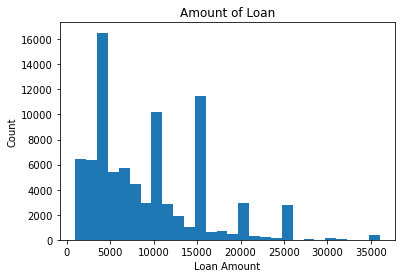

In [38]:
# A histogram showing the distribution Loan's original amount.
bins = np.arange(p_clean['LoanAmount'].min(), p_clean['LoanAmount'].max()+1250, 1250)
plt.hist(data= p_clean, x= 'LoanAmount', bins= bins)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Amount of Loan');

skewed to the right with several spikes

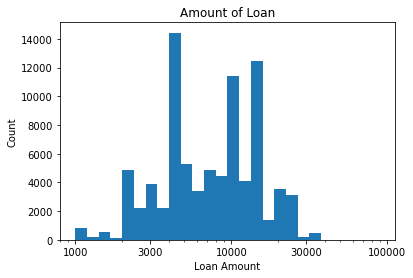

In [39]:
# I will plot the histogram on a log scale..
x = np.log10(p_clean['LoanAmount'].describe())
bins = 10 ** np.arange(x.min(), x.max()+0.075, 0.075)
plt.hist(data= p_clean, x= 'LoanAmount', bins= bins)
plt.xscale('log')
x_ticks = [1000, 3000, 10000, 30000, 100000]
plt.xticks(ticks= x_ticks, labels= x_ticks)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Amount of Loan');

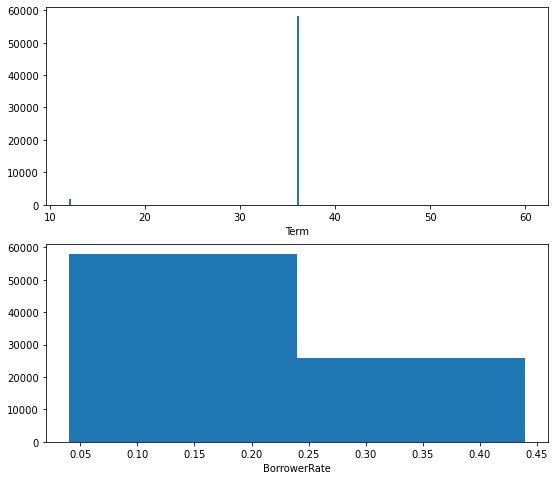

In [40]:
# re-using code to plot term and borrower's rate.
fig, ax = plt.subplots(nrows=2, figsize = [9,8])

variables = ['Term', 'BorrowerRate']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(p_clean[var]), max(p_clean[var])+0.2, 0.2)
    ax[i].hist(data = p_clean, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))

plt.show()

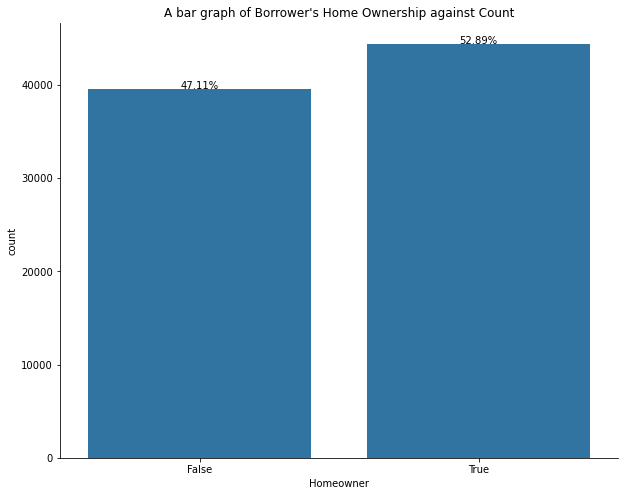

In [41]:
# A bar graph showing Number of borrowers who are home owners.
bar_texts(p_clean['Homeowner'].astype(str), 'Homeowner')
plt.title('A bar graph of Borrower\'s Home Ownership against Count')
plt.xticks(rotation= 0);

<a id = 'uni_find'></a>
# Univariate Findings

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


The ProsperRating variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data just has a peak but skewed to the right.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- For the occupation, considering the fact that the values are too much when plotted, I filterd out the top 20 occupations for easy readability.
- For the monthly income column, I had to remove the outliers of values that were above **1e5\$**.


<a id = 'bi_explor'></a>

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [42]:
numeric_vars = ['LoanAmount', 'MonthlyIncome', 'DelinquenciesLast7Years', 'BorrowerRate', 'Term']
categoric_vars = ['EmploymentStatus', 'ProsperRating', 'ListingCategory', 'Homeowner', 'LoanStatus']

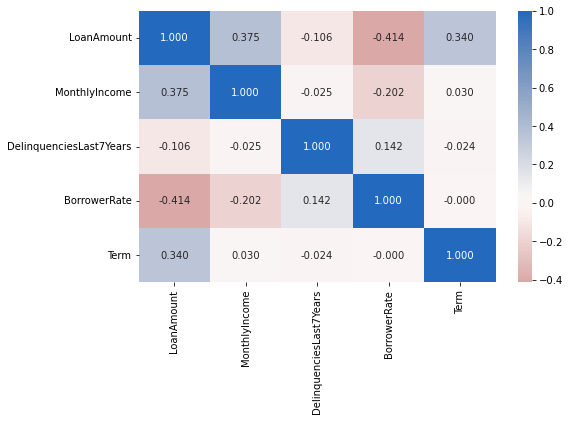

In [43]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(p_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

As expected, most of the varibles are negatively correlated with delinquencies. This implies that as these variables increase, the probability that the borrower won't pay back decreases. However, this correlation is not show strong for all of them except for the loan amount.
On the other hand, Borrower's rate is possively correlated with delinquencies. That is, the more someone borrows, the higher the tendeny to default.

Also, loan amount is possitively correlated to both monthly income and  the term(duration) of the loan.

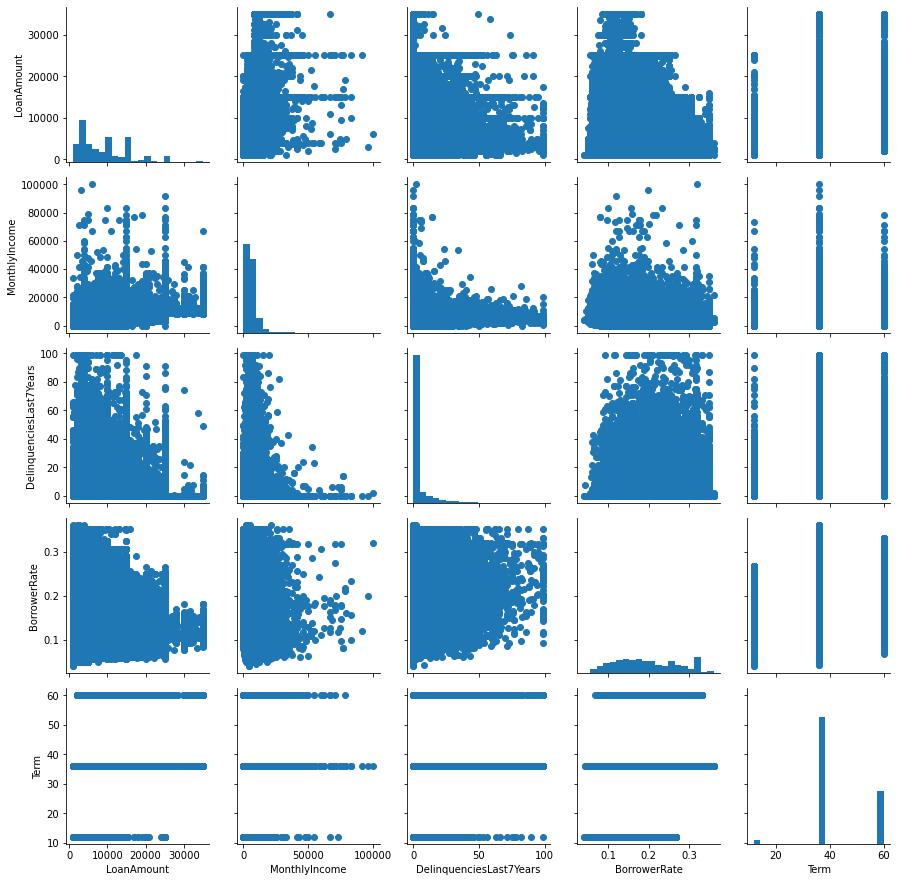

In [44]:
g = sb.PairGrid(data = p_clean, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

Observing this graph, it explians the point stated above under the heatmap futher. Delinquences has shown expected correlation with loan amount and monthly income positively and with borrower's rate negatively.

I'll now explore the two categorical variable of intrest: Employment status, and Prosper rating.

<Figure size 1080x936 with 0 Axes>

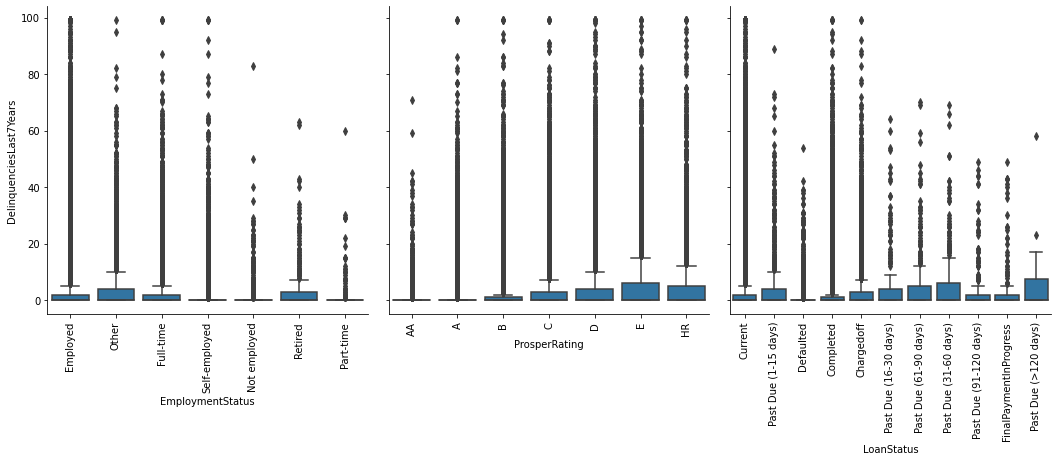

In [45]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 90)

plt.figure(figsize = [15, 13])
g = sb.PairGrid(data = p_clean, y_vars = ['DelinquenciesLast7Years'], x_vars = ['EmploymentStatus', 'ProsperRating', 'LoanStatus'],
                height = 5, aspect = 1)
g.map(boxgrid);

plt.show();

People that failed to disclose their real employment status (others) and the retieris tend not to repay back ther loan than any other person followed by those that are currently working (Employed and Full-time).

As expected from the sencond graph, the proper rating is a good predictor of the probability that a borrower will/will not pay back.

Looking at the third graph, the longer it takes to pay back, the higher the tendency to default. However, there is a slight observeable change to loan that have dued in the past 91-120 days.

Finally, I'll plot the rationship between my other variables of interest: Loan status, Employment status and Occupation

In [46]:
p_clean['EmploymentStatus'].unique

<bound method Series.unique of 1          Employed
3          Employed
4          Employed
5          Employed
6          Employed
            ...    
113932     Employed
113933     Employed
113934     Employed
113935    Full-time
113936     Employed
Name: EmploymentStatus, Length: 83970, dtype: object>

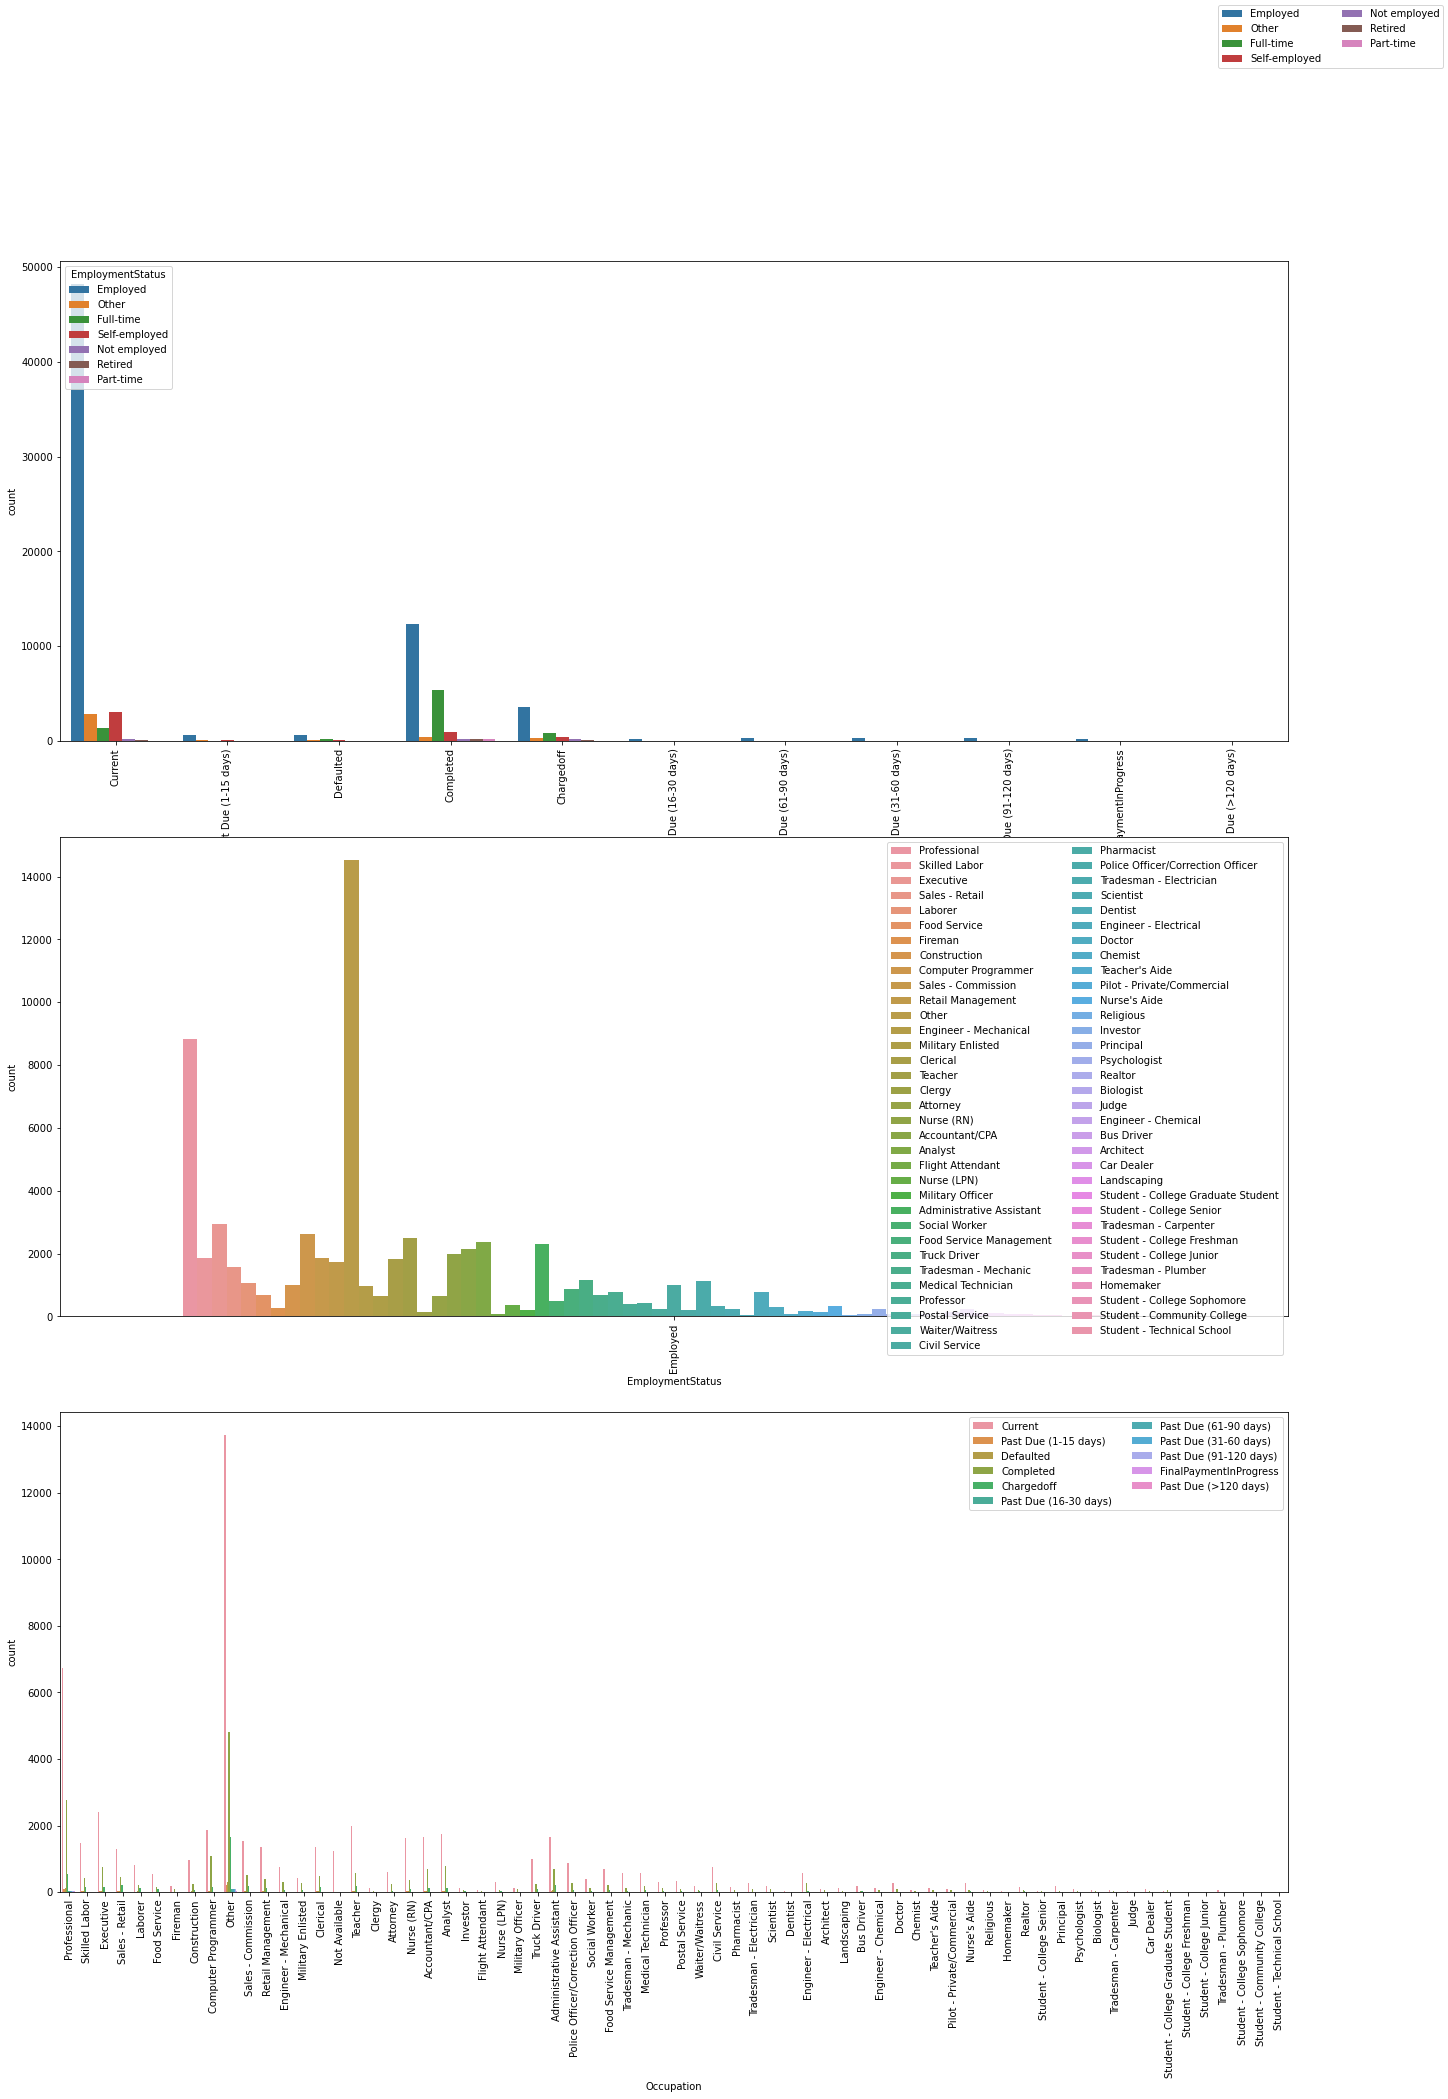

In [47]:
# since there's only three subplots to create, using the full data should be fine.
ax = plt.figure(figsize = [22, 30])

# subplot 1: LoanStatus vs EmploymentStatus
plt.subplot(3, 1, 1)
sb.countplot(data = p_clean, x = 'LoanStatus', hue = 'EmploymentStatus')
plt.xticks(rotation = 90)
ax.legend(loc = 1, ncol = 2)

# subplot 2: Occupation vs Employed borowers
employed = p_clean[p_clean['EmploymentStatus'] == 'Employed']
ax = plt.subplot(3, 1, 2)
sb.countplot(data = employed, x = 'EmploymentStatus', hue = 'Occupation')
plt.xticks(rotation = 90)
ax.legend(loc = 1, ncol = 2)

# subplot 3: Occupation vs LoanStatus
ax = plt.subplot(3, 1, 3)
sb.countplot(data = p_clean, x = 'Occupation', hue = 'LoanStatus')
plt.xticks(rotation = 90)
ax.legend(loc = 1, ncol = 2)

plt.show()

From the first graph, loan status versus employment status, majority of the borrowers carry the label **employed**. While others are either **self-employed, full-time** or **others** 

From the second graph, employed borrowers versus occupation, majority of the borrowers are just labelled **others**. While others are either **professionals, and analysts** 

From the third graph, loan status and occupation, borrowers with current loan are many and they are either **professsionals**, **executives** or labelled **other**

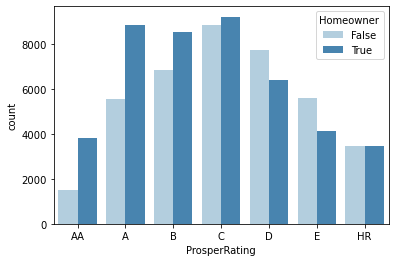

In [48]:
# A plot showing the relation between Prosper Rating and Home owner variables.
sb.countplot(data= p_clean, x= 'ProsperRating', hue= 'Homeowner', palette = 'Blues');

This plot shows the relationship between house ownership of the borrower and the prosper rating. Observing the first four high ratings, AA A, B, and C, majority of the borrowers are house owners while the reverse is for low ratings, D and E.

I'll check then check how the prosper rating relates with loan status

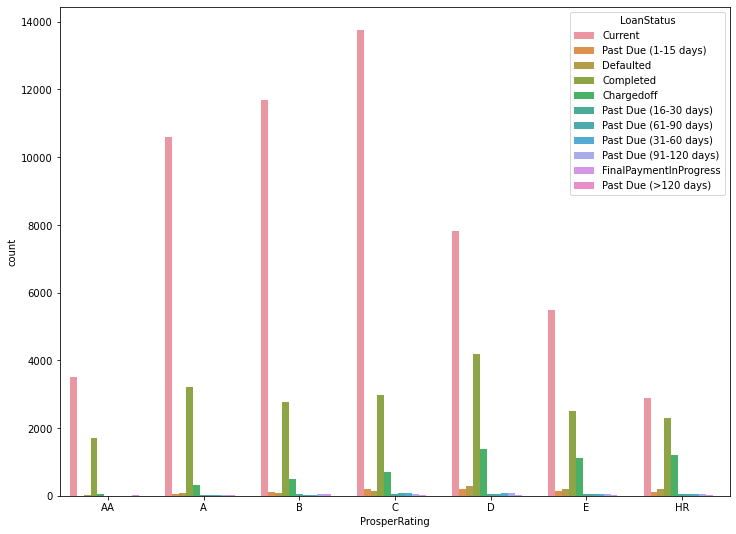

In [49]:
# A plot showing the relation between Prosper Rating and Loan Status variables.
plt.figure(figsize = [12, 9])
sb.countplot(data= p_clean, x= 'ProsperRating', hue= 'LoanStatus');

This plot shows the relationship between rosper rating relates with loan status rating. Observing the first four high ratings, AA A, B, and C, majority of the borrowers are have an ongiong loan. The proportion of the current and completed loan however decreases downwards. An unexpected rise is also observed at D and E. While almost equal proportion occurs at HR rating.

<a id = 'bi_find'></a>
# Bivariate Findings

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Firstly, as expected, proper rating is a good predictor of the probability that a borrower will/will not pay back. While most of the varibles are negatively correlated with delinquencies, Borrower's rate, however, is possively correlated with delinquencies wich is also much more expected.

Also, loan amount shows an appriaciable level of connection both monthly income and  the term(duration) of the loan. People who failed to disclose their real employment status (others) and the retieris tend not to repay back ther loan than any other person followed by those that are currently working. The longer it takes to pay back, the higher the tendency to default but with a slight observeable change to loan that have dued in the past 91-120 days.

Finally, majority of the borrowers are employed. and they are either professionals, analysts executives or labelled **others**

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It was observed that there happened to be a logical relationship between the amount of that is usually borrowed by those who earn huge income (compared to others). Due to the amount borrowed being high, they also demand for a longer perion for repayment.


<a id = 'multi_explor'></a>

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how monthly income, loan amount and borrower rate have been used to determine the prosper rating and how the historical delinquinces justifies this rating.

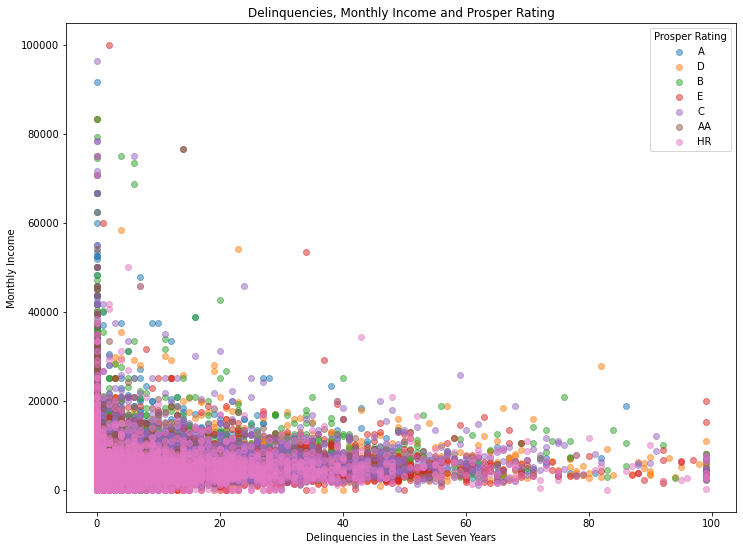

In [50]:
# A plot showing the relationship between Delinquencies, Monthly Income and Prosper Rating
cat_markers = p_clean.ProsperRating.unique()
plt.figure(figsize = [12,9])
for cat in cat_markers:
    clean_cat = p_clean[p_clean.ProsperRating == cat]
    plt.scatter(data = clean_cat, x = 'DelinquenciesLast7Years', y = 'MonthlyIncome', alpha = 0.5)
plt.xlabel('Delinquencies in the Last Seven Years')
plt.ylabel('Monthly Income')
plt.title('Delinquencies, Monthly Income and Prosper Rating')
plt.legend(cat_markers, title= 'Prosper Rating');

Here, it can be seen that the prosper rating AA is commonly associated with high monthly income and low delinqueny. The reverse is seen for rating E. While rating B is somehow evenly distributed.

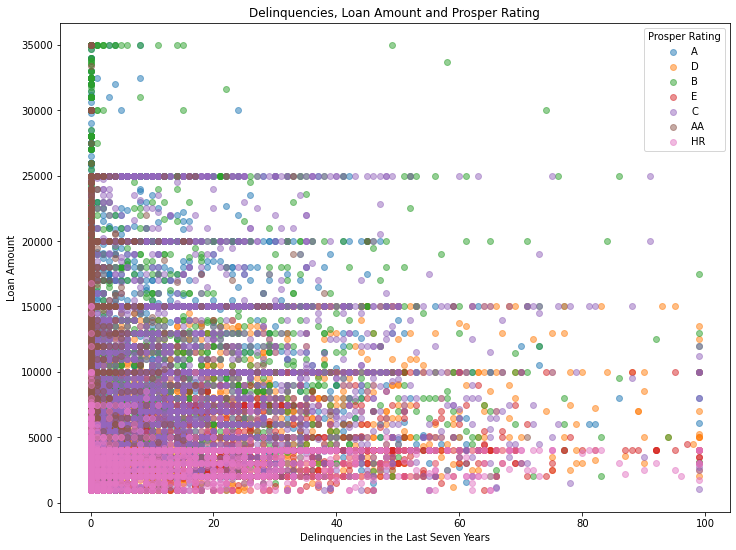

In [51]:
# A plot showing the relationship between Delinquencies, Loan Amount and Prosper Rating
cat_markers = p_clean.ProsperRating.unique()
plt.figure(figsize = [12,9])
for cat in cat_markers:
    clean_cat = p_clean[p_clean.ProsperRating == cat]
    plt.scatter(data = clean_cat, x = 'DelinquenciesLast7Years', y = 'LoanAmount', alpha = 0.5)
plt.xlabel('Delinquencies in the Last Seven Years')
plt.ylabel('Loan Amount')
plt.title('Delinquencies, Loan Amount and Prosper Rating')
plt.legend(cat_markers, title= 'Prosper Rating');

Here, it can be seen that the prosper rating AA is commonly seen in borrowers moderately huge loan amount and low delinqueny. The reverse is seen for rating E. Ratings D and C are characterized by moderate to high loan amount and relatively high delinquencies. While rating B is somehow evenly distributed for delinquency and high for the loan amount.

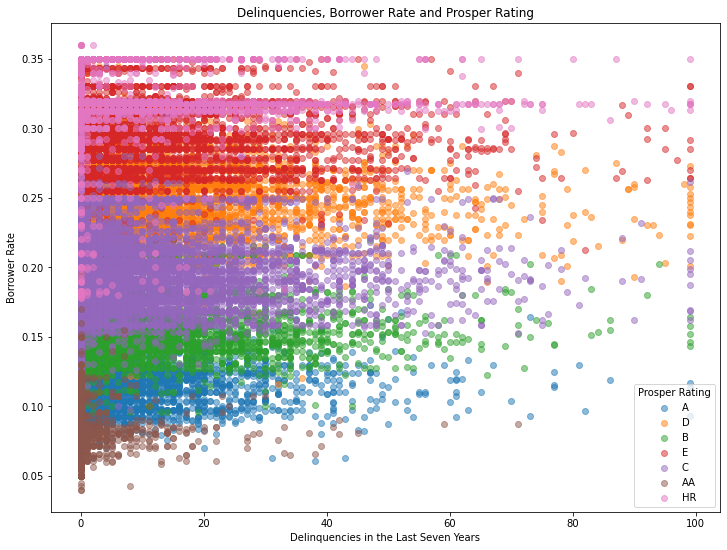

In [52]:
# A plot showing the relationship between Delinquencies, Borrower Rate and Prosper Rating
cat_markers = p_clean.ProsperRating.unique()
plt.figure(figsize = [12,9])
for cat in cat_markers:
    clean_cat = p_clean[p_clean.ProsperRating == cat]
    plt.scatter(data = clean_cat, x = 'DelinquenciesLast7Years', y = 'BorrowerRate', alpha = 0.5)
plt.xlabel('Delinquencies in the Last Seven Years')
plt.ylabel('Borrower Rate')
plt.title('Delinquencies, Borrower Rate and Prosper Rating')
plt.legend(cat_markers, title= 'Prosper Rating');

With this plot, I can save conclude that borrowers with good prosper rating, AA, borrow less frequently and rearly default. The opposite is true for those with bad or poor rating, E and HR. The same logic hold for other ratings as well.

<a id = 'multi_find'></a>
# Multivariate Findings

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The prosper rating AA is commonly associated with high monthly income and low delinqueny. As the rating goes down, for most of the borrowers, the monthly income decreases and delinquency moves up. It can also be seen that the prosper rating AA is commonly seen in borrowers with moderately huge loan amount this is because this kind of people are also characterized with high income and thus they have something to pay back. The reverse is seen for rating E. Ratings D and C are characterized by moderate to huge loan amount and relatively high delinquency.

Borrowers with good prosper rating, AA, borrow less frequently and rearly default. The opposite is true for those with bad or poor rating, E and HR (the same logic hold for other ratings as well). Looking at this relatonship, it is logic to think that because this people earn good income, they don't usually borrow. Perhaps they do when they plan to carryout an important project such as buuilding a house and they are able to pay back when they are done with such a project. Less wonder while this kind of borrower always demand for long term loans.

### Were there any interesting or surprising interactions between features?

Firtly, It is intresting that borrowers with good rating borrow less. Simply put, the less you ask the more valuable you are. Looking at the last multivariate plot, borrowers with no historical record were rated high, AA, until it reaches a loan amount of **$25000** when the rating suddenly dropped to B.

<a id = 'conclusion'></a>

## Conclusions
>From the insights above, it is save to conclude that the monthly income, loan amount and borrower rate is a good predictor of the prosper rating with the later being a good predictor of delinquency.
